In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Задача № 4, Вариант № 7:
\begin{equation*}
 \begin{cases}
   \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} +    \frac{\partial^2 u}{\partial y^2}
   -xy\sin{x},
   \\
   u(0,y,t)=0,
   \\
   u(1,y,t)= y\cos{t},
   \\
   u(x,0,t)= 0,
   \\
   u(x,1,t)= x\cos{t},
   \\
   u(x,y,0)= xy
 \end{cases}
\end{equation*}

In [2]:
dy = 0.01
dx = 0.01
start_x = 0
stop_x = 1
start_y = 0
stop_y = 1

#### Аналитическое решение

\begin{equation*}
    U(x,y,t)=xy\cos t
\end{equation*}

Text(0.5, 0, 'x')

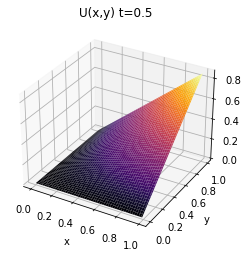

In [3]:
t = 0.5
x_coord = np.arange(start_x, stop_x,dx)
y_coord = np.arange(start_y, stop_y,dy)
x_coord, y_coord = np.meshgrid(x_coord, y_coord)
solve_an = x_coord*y_coord*np.cos(t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_coord, y_coord, solve_an, cmap='inferno')
plt.title("U(x,y) t=0.5")
plt.ylabel('y')
plt.xlabel('x')
#ax.scatter(x_coord, t_coord, solve_an, s=1)

 ### Необходимые переменные

In [4]:
DT=0.001
#Границы и шаг по X
XN=0
XK=1
NX=20
#Границы и шаг по Y
YN=0
YK=1
NY=20
#a и b
AX, AY=1, 1
#Коэффициенты при задании граничных условий
ALN=0
BEN=1
ALL=0
BEL=1
ALV=0
BEV=1
ALP=0
BEP=1 
PI=np.pi

### Функции решателя

In [5]:
#Заполнение 0 слоя
def layer_0(x, nx, y, ny, t):
    U = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            U[i][j]=x[i]*y[j]
    return U

#Функция, задающая неоднородность
def neodn(x, nx, y, ny, t):
    f = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            f[i][j]=-x[i]*y[j]*np.sin(t)
            #f[i][j]=0
    return f

#Функция, задающая аналитическое решение
def test_func(x, nx, y, ny, t):
    UA = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            UA[i][j]=x[i]*y[j]*np.cos(t)
    return UA

#Функции для граничных условий
def init_boundary_X(y,t):
    phi_0, phi_N = [], []
    for i in y:
        phi_0.append(0)
        phi_N.append(i*np.cos(t))
    return phi_0, phi_N
    
def init_boundary_Y(x,t):
    phi_0, phi_N = [], []
    for i in x:
        phi_0.append(0)
        phi_N.append(i*np.cos(t))
    return phi_0, phi_N

#Метод прогонки
def tm_alg(A, B, C, D, n):
    Q, P, X = [], [], [0] * n
    Q.append(C[0] / B[0])
    P.append(D[0] / B[0])

    for i in range(1, n):
        ZN = B[i] - A[i]*Q[i-1]

        if ZN == 0:
            print('Error!')
            return -1

        Q.append(C[i] / ZN)
        P.append((D[i] - A[i]*P[i-1]) / ZN)

    for i in range(n - 1, -1, -1):
        if i == n - 1:
            X[i] = P[i]
        else:
            X[i] = P[i] - Q[i] * X[i + 1]

    return X

In [6]:
def metod_perem_n(TI, TIMAX,DT, NX, NY):
    
    #Обнуляю все необходимые матрицы и массивы
    masX = np.zeros(NX)
    masY = np.zeros(NY)
    matr = np.zeros((NX,NY))

    U, UN, X, UP, UAN = matr, matr, masX, matr, matr
    FIN, FIL, FIV, FIP, F = masX, masX, masY, masY, matr
    A1, B1, C1, D1, Y = masX, masX, masX, masX, masY
    A2, B2, C2, D2, UU = masY, masY, masY, masY, matr
    
    ITMAX = int((TIMAX-TI)/DT)+1
    #Заполнение X и Y в нужных пределах
    HX = (XK-XN)/(NX-1)
    X=[]
    for i in range(NX):
        X.append(XN+HX*(i))

    HY = (YK-YN)/(NY-1)
    Y=[]
    for i in range(NY):
        Y.append(YN+HY*(i))

    #Нулевой слой
    U = layer_0(X, NX,Y, NY, TI)
    UP, UN = U, U
    UAN = test_func(X, NX,Y, NY, TI)

    #Рассчет прогоночных коэффициентов
    A1, B1, C1 =[], [], []
    A1.append(0)
    B1.append(BEL*HX-ALL)
    C1.append(ALL)
    for i in range(1,NX-1):
        A1.append(-0.5*AX*DT/(HX*HX))
        B1.append(1+AX*DT/(HX*HX))
        C1.append(-0.5*AX*DT/(HX*HX))
    A1.append(-ALP)
    B1.append(BEP*HX+ALP)
    C1.append(0)

    A2, B2, C2 =[], [], []
    A2.append(0)
    B2.append(BEN*HY-ALN)
    C2.append(ALN)
    for i in range(1,NY-1):
        A2.append(-0.5*AY*DT/(HY*HY))
        B2.append(1+AY*DT/(HY*HY))
        C2.append(-0.5*AY*DT/(HY*HY))
    A2.append(-ALV)
    B2.append(BEV*HY+ALV)
    C2.append(0)

    #Основной цикл
    for IT in range(0, ITMAX-1):
        TI0=TI
        TIP = TI+0.5*DT
        TI = TI+DT
        #Граничные условия
        F = neodn(X, NX,Y, NY, TIP)
        FIL, FIP = init_boundary_X(Y,TI)
        FIN, FIV = init_boundary_Y(X,TI)
        #Прогонка по X
        for j in range(1, NY-1):
            D1[0]=FIL[j]*HX
            D1[NX-1]=FIP[j]*HX
            for i in range(1, NX-1):
                D1[i]=U[i][j]+0.5*DT*(AY*(U[i][j-1]-2*U[i][j]+U[i][j+1])/(HY*HY)+F[i][j])
            UU = tm_alg(A1, B1, C1, D1, NX)
            for i in range(NX):
                UP[i][j]=UU[i]
                UN[i][j]=UU[i]
        #Прогонка по Y
        for j in range(1, NY-1):
            D2[0]=FIN[j]*HY
            D2[NY-1]=FIV[j]*HY
            for i in range(1, NY-1):
                D2[i]=U[j][i]+0.5*DT*(AX*(UP[j-1][i]-2*UP[j][i]+UP[j+1][i])/(HX*HX)+F[j][i])
            UU = tm_alg(A2, B2, C2, D2, NY)
            for i in range(NY):
                UN[j][i]=UU[i]

        #Заполнение угловых точек        
        UN[0][0]=0.5*((FIL[0]*HX-ALL*UN[1][0])/(BEL*HX-ALL)+(FIN[0]*HY-ALN*UN[0][1])/(BEN*HY-ALN))
        UN[0][NY-1]=0.5*((FIL[NY-1]*HX-ALL*UN[1][NY-1])/(BEL*HX-ALL)+(FIV[0]*HY+ALV*UN[0][NY-2])/(BEV*HY+ALV))
        UN[NX-1][NY-1]=0.5*((FIP[NY-1]*HX+ALP*UN[NX-2][NX-1])/(BEP*HX+ALP)+(FIV[NX-1]*HY+ALV*UN[NX-1][NX-2])/(BEV*HY+ALV))
        UN[NX-1][0]=0.5*((FIP[0]*HX+ALP*UN[NX-2][0])/(BEP*HX+ALP)+(FIN[NX-1]*HY-ALN*UN[NX-1][1])/(BEN*HY-ALN))


        #Переход к рассчету нового слоя
        for i in range(NX):
            for j in range(NY):
                U[i][j]= UN[i][j]
    UAN = test_func(X, NX, Y, NY, TI)
    return U, UAN, TI

In [7]:
#Функция для вывода графиков и погрешностей
def print_err1(UN, UAN, TI):
    x_coord = np.linspace(XN, XK, NX)
    y_coord = np.linspace(YN, YK, NY)
    xx, yy = np.meshgrid(x_coord, y_coord)

    U_tr = np.transpose(UN)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy,  U_tr, cmap='inferno')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title("U(x,y) в момент времени "+str(float('{:.2f}'.format(TI))))
    
    
    U_tr = np.transpose(UN-UAN)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy,  U_tr, cmap='inferno')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title("погрешность в момент времени "+str(float('{:.2f}'.format(TI))))
    
#Функция для вывода погрешностей
def print_err2(UN, UAN, string):
    x_coord = np.linspace(XN, XK, NX)
    y_coord = np.linspace(YN, YK, NY)
    xx, yy = np.meshgrid(x_coord, y_coord)  
    
    U_tr = np.transpose(UN-UAN)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy,  U_tr, cmap='inferno')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title("погрешность "+string)

### Использование решателя(метод переменных направлений)

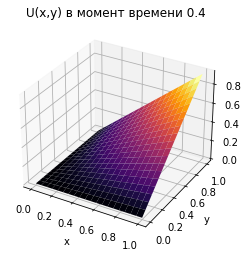

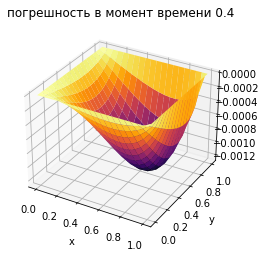

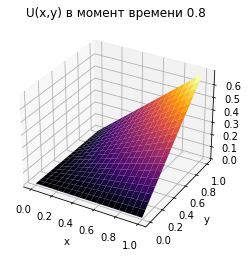

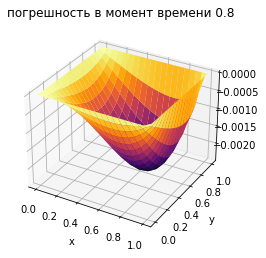

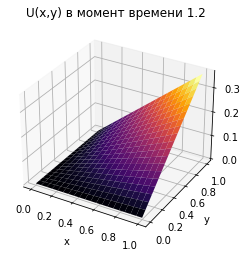

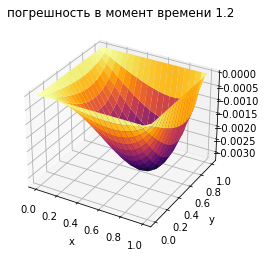

In [8]:
#Вывожу результаты и погрешность через каждые 0.4t
DT=0.001
NX=20
NY=20
for i in range(1,4):
    TI = 0
    TIMAX=0.4*i
    U, UAN, TI = metod_perem_n(TI, TIMAX, DT, NX, NY)
    print_err1(U, UAN, TI)

### Зависимость погрешности от DT (метод переменных направлений)

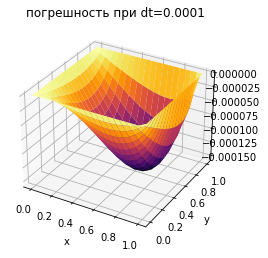

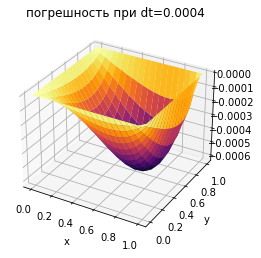

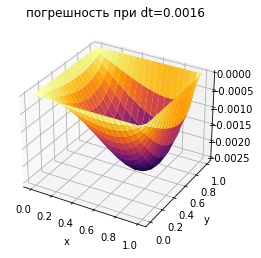

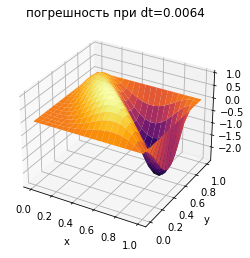

In [9]:
#Зависимость погрешности от dt
DT=0.0001
for i in range(4):
    TI = 0
    TIMAX=0.5
    U, UAN, TI = metod_perem_n(TI, TIMAX, DT, NX, NY)
    print_err2(U, UAN, "при dt="+str(DT))
    DT*=4

### Зависимость погрешности от количества ячеек по X и Y (метод переменных направлений)

dt=  0.016200000000000003
sigma=  0.40499999999999997
dt=  0.004050000000000001
sigma=  0.40499999999999997
dt=  0.0010125000000000002
sigma=  0.40499999999999997
dt=  0.00025312500000000004
sigma=  0.40499999999999997


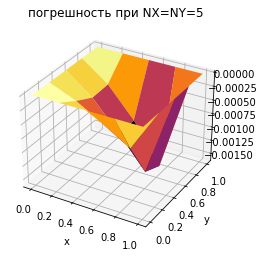

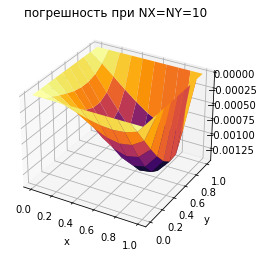

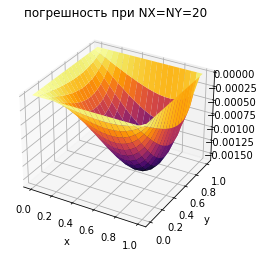

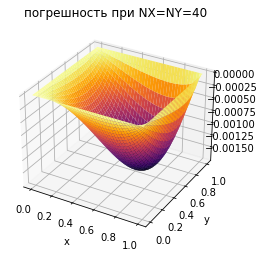

In [10]:
#Зависимость погрешности от NX
DT=0.001
NX=5
NY=5

for i in range(4):
    dx=(XK-XN)/NX
    DT = ((0.9*dx)**2)/(2*AX)
    print("dt= ",DT)
    print("sigma= ", (AX*DT)/(dx**2))
    
    TI = 0
    TIMAX=0.5
    U, UAN, TI = metod_perem_n(TI, TIMAX, DT, NX, NY)
    print_err2(U, UAN, "при NX=NY="+str(NX))
    NX*=2
    NY*=2

### Реализация метода дробного шага

In [11]:
def metod_drobn_shag(TI, TIMAX,DT, NX, NY):
    
    #Обнуляю все необходимые матрицы и массивы
    masX = np.zeros(NX)
    masY = np.zeros(NY)
    matr = np.zeros((NX,NY))

    U, UN, X, UP, UAN = matr, matr, masX, matr, matr
    FIN, FIL, FIV, FIP, F = masX, masX, masY, masY, matr
    A1, B1, C1, D1, Y = masX, masX, masX, masX, masY
    A2, B2, C2, D2, UU = masY, masY, masY, masY, matr
    
    ITMAX = int((TIMAX-TI)/DT)+1
    #Заполнение X и Y в нужных пределах
    HX = (XK-XN)/(NX-1)
    X=[]
    for i in range(NX):
        X.append(XN+HX*(i))

    HY = (YK-YN)/(NY-1)
    Y=[]
    for i in range(NY):
        Y.append(YN+HY*(i))

    #Нулевой слой
    U = layer_0(X, NX,Y, NY, TI)
    UP, UN = U, U
    UAN = test_func(X, NX,Y, NY, TI)

    #Рассчет прогоночных коэффициентов
    A1, B1, C1 =[], [], []
    A1.append(0)
    B1.append(BEL*HX-ALL)
    C1.append(ALL)
    for i in range(1,NX-1):
        A1.append(-AX*DT/(HX*HX))
        B1.append(1+2*AX*DT/(HX*HX))
        C1.append(-AX*DT/(HX*HX))
    A1.append(-ALP)
    B1.append(BEP*HX+ALP)
    C1.append(0)

    A2, B2, C2 =[], [], []
    A2.append(0)
    B2.append(BEN*HY-ALN)
    C2.append(ALN)
    for i in range(1,NY-1):
        A2.append(-AY*DT/(HY*HY))
        B2.append(1+2*AY*DT/(HY*HY))
        C2.append(-AY*DT/(HY*HY))
    A2.append(-ALV)
    B2.append(BEV*HY+ALV)
    C2.append(0)

    #Основной цикл
    for IT in range(0, ITMAX-1):
        TI0=TI
        TIP = TI+0.5*DT
        TI = TI+DT
        #Граничные условия
        F0 = neodn(X, NX,Y, NY, TI0)
        F1 = neodn(X, NX,Y, NY, TI)
        FIL, FIP = init_boundary_X(Y,TI)
        FIN, FIV = init_boundary_Y(X,TI)
        #Прогонка по X
        for j in range(1, NY-1):
            D1[0]=FIL[j]*HX
            D1[NX-1]=FIP[j]*HX
            for i in range(1, NX-1):
                D1[i]=U[i][j]+0.5*DT*(F0[i][j])
            UU = tm_alg(A1, B1, C1, D1, NX)
            for i in range(NX):
                UP[i][j]=UU[i]
                UN[i][j]=UU[i]
        #Прогонка по Y
        for j in range(1, NY-1):
            D2[0]=FIN[j]*HY
            D2[NY-1]=FIV[j]*HY
            for i in range(1, NY-1):
                D2[i]=U[j][i]+0.5*DT*(F1[j][i])
            UU = tm_alg(A2, B2, C2, D2, NY)
            for i in range(NY):
                UN[j][i]=UU[i]

        #Заполнение угловых точек        
        UN[0][0]=0.5*((FIL[0]*HX-ALL*UN[1][0])/(BEL*HX-ALL)+(FIN[0]*HY-ALN*UN[0][1])/(BEN*HY-ALN))
        UN[0][NY-1]=0.5*((FIL[NY-1]*HX-ALL*UN[1][NY-1])/(BEL*HX-ALL)+(FIV[0]*HY+ALV*UN[0][NY-2])/(BEV*HY+ALV))
        UN[NX-1][NY-1]=0.5*((FIP[NY-1]*HX+ALP*UN[NX-2][NX-1])/(BEP*HX+ALP)+(FIV[NX-1]*HY+ALV*UN[NX-1][NX-2])/(BEV*HY+ALV))
        UN[NX-1][0]=0.5*((FIP[0]*HX+ALP*UN[NX-2][0])/(BEP*HX+ALP)+(FIN[NX-1]*HY-ALN*UN[NX-1][1])/(BEN*HY-ALN))


        #Переход к рассчету нового слоя
        for i in range(NX):
            for j in range(NY):
                U[i][j]= UN[i][j]
    UAN = test_func(X, NX, Y, NY, TI)
    return U, UAN, TI

## Вычисления методом дробного шага

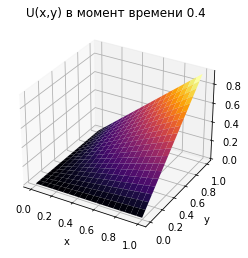

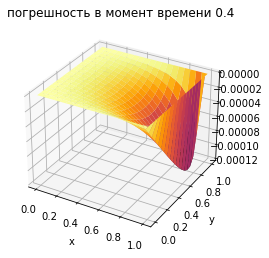

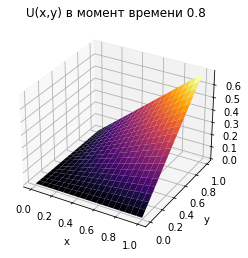

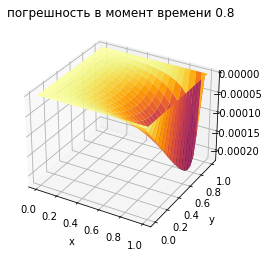

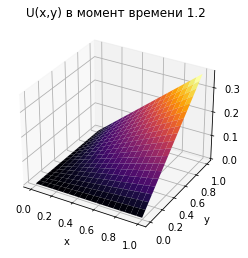

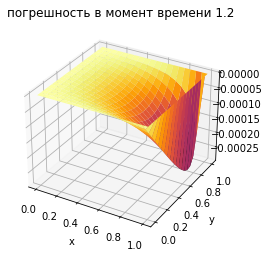

In [12]:
#Вывожу результаты и погрешность через каждые 0.4t
DT=0.001
NX=20
NY=20
for i in range(1,4):
    TI = 0
    TIMAX=0.4*i
    U, UAN, TI = metod_drobn_shag(TI, TIMAX, DT, NX, NY)
    print_err1(U, UAN, TI)

### Зависимость погрешности от DT (метод дробного шага)

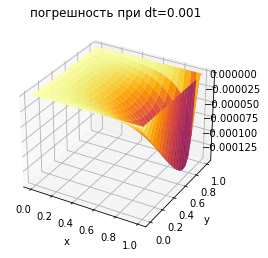

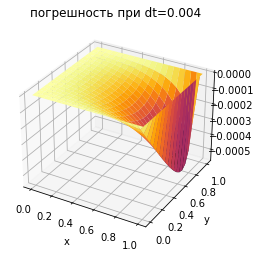

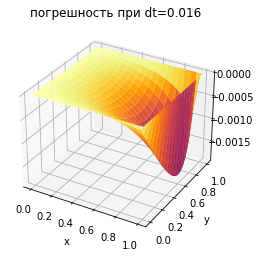

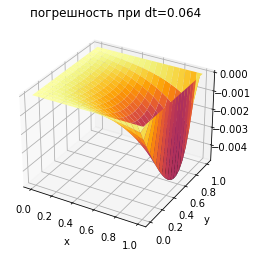

In [13]:
#Зависимость погрешности от dt
DT=0.001
for i in range(4):
    TI = 0
    TIMAX=0.5
    U, UAN, TI = metod_drobn_shag(TI, TIMAX, DT, NX, NY)
    print_err2(U, UAN, "при dt="+str(DT))
    DT*=4

### Зависимость погрешности от количества ячеек по X и Y (метод дробного шага)

dt=  0.016200000000000003
sigma=  0.40499999999999997
dt=  0.004050000000000001
sigma=  0.40499999999999997
dt=  0.0010125000000000002
sigma=  0.40499999999999997
dt=  0.00025312500000000004
sigma=  0.40499999999999997


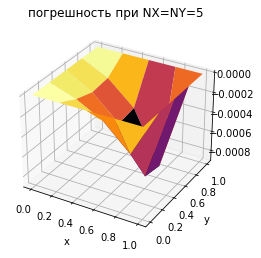

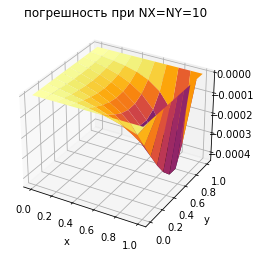

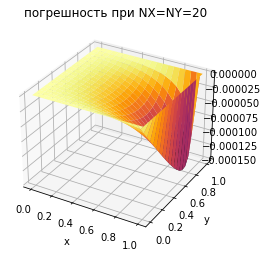

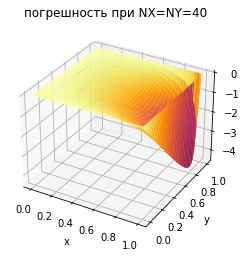

In [14]:
#Зависимость погрешности от NX
DT=0.001
NX=5
NY=5

for i in range(4):
    dx=(XK-XN)/NX
    DT = ((0.9*dx)**2)/(2*AX)
    print("dt= ",DT)
    print("sigma= ", (AX*DT)/(dx**2))
    
    TI = 0
    TIMAX=0.5
    U, UAN, TI = metod_drobn_shag(TI, TIMAX, DT, NX, NY)
    print_err2(U, UAN, "при NX=NY="+str(NX))
    NX*=2
    NY*=2